In [4]:
# Importing Packages
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential

In [5]:
# Importing Dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3433s 20us/step


In [6]:
# Dataset shape
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_train.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(50000, 1)


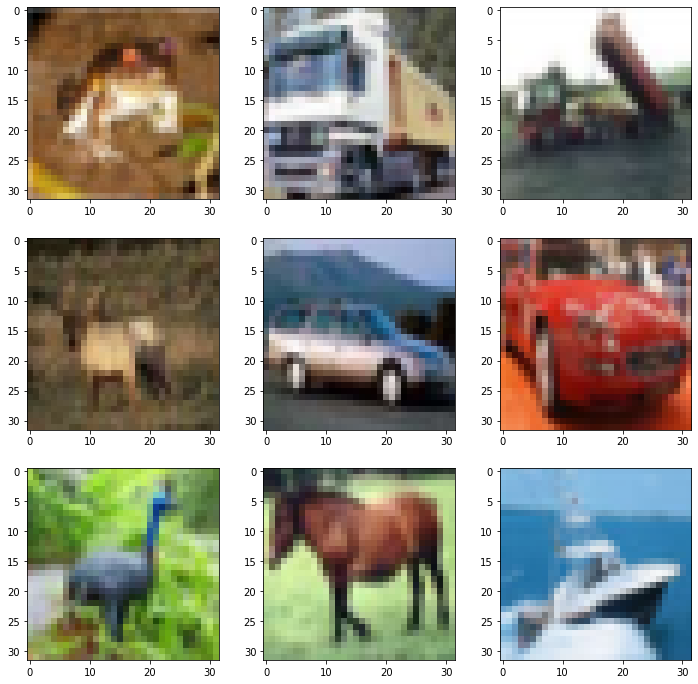

In [7]:
# Image Samples
plt.figure(figsize = (12,12))
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
# Reshaping
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [9]:
# Normalization
X_train /= 255
X_test /= 255

In [10]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices - One hot encoding
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [11]:
# CNN Model
model = Sequential()
model.add(Convolution2D(32, kernel_size = (3, 3),strides = (1,1),padding = "valid", activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Convolution2D(32, kernel_size = (3, 3),strides = (1,1),padding = "valid", activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [12]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [13]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
# Fitting the data for training
history = model.fit(X_train,Y_train,batch_size = 128,epochs = 50,validation_data=(X_test,Y_test))

Epoch 1/50
391/391 [==============================] - 3s 7ms/step - loss: 0.5193 - accuracy: 0.8199 - val_loss: 0.9426 - val_accuracy: 0.7011
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5073 - accuracy: 0.8252 - val_loss: 0.9862 - val_accuracy: 0.6841
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 0.4808 - accuracy: 0.8334 - val_loss: 0.9778 - val_accuracy: 0.6958
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 0.4667 - accuracy: 0.8357 - val_loss: 0.9640 - val_accuracy: 0.7021
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 0.4461 - accuracy: 0.8449 - val_loss: 1.0404 - val_accuracy: 0.6947
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 0.4295 - accuracy: 0.8510 - val_loss: 1.0430 - val_accuracy: 0.6965
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 0.4123 - accuracy: 0.8567 - val_loss: 1.0622 - val_accuracy: 0.6901
Epoch 

KeyboardInterrupt: 